# Pipe to analyse a Scheldule

## Import lib

In [1]:
import os
import sys

In [2]:
parent_directory = os.path.dirname(os.getcwd())
sys.path.append(parent_directory)  

from utils.utils import load_data, transform_data, merge_data, get_mean_time_presta_client
from utils.EDT_analysis import *

## Download data

In [3]:
drop_prestations = [
    "ADMINISTRATION",
    "FORMATION",
    "COORDINATION",
    "HOMMES TOUTES MAINS",
    "VISITE MEDICALE",
]

In [4]:
data = load_data()
data = transform_data(data)
df_merge = merge_data(data)
df_merge = get_mean_time_presta_client(df_merge)

/Users/guillaumeplassais/Documents/HEC/data_4_health/utils/utils.py:77: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  data["intervenants"]["Compétences"]
/Users/guillaumeplassais/Documents/HEC/data_4_health/utils/utils.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_merge.assign(


In [5]:
dist_mtx_c2c, dist_mtx_i2c = load_dist_matrix()

## Results

In [6]:
res_ = dist_bike_car(df_merge, dist_mtx_c2c, dist_mtx_i2c)
res_[0]

100%|██████████| 417/417 [00:02<00:00, 156.28it/s]


,Permis,distance_tot,percentage
0,Bike,43852.39,19.43
1,Car,181801.91,80.57


In [7]:
res_[1]

alt.Chart(...)

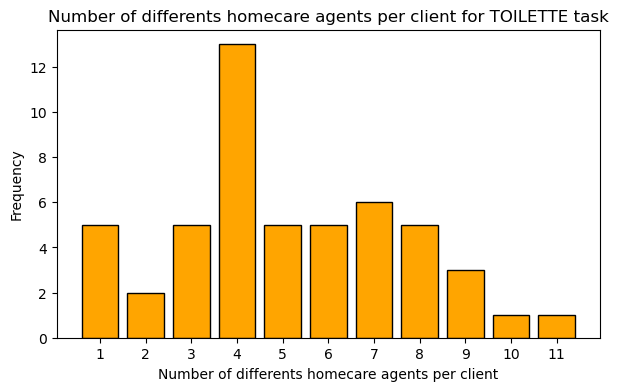

mean    5.117647
std     2.503174
Name: ID Intervenant, dtype: float64

In [8]:
nbr_inter_for_TOILETTE(df_merge)

Percentage of tasks followed by a downtime :  11.91%
Total time (in hours) lost in downtime on January : 691.47
Total time (in hours) lost in downtime on January per day worked: 1.59


<AxesSubplot:ylabel='Frequency'>

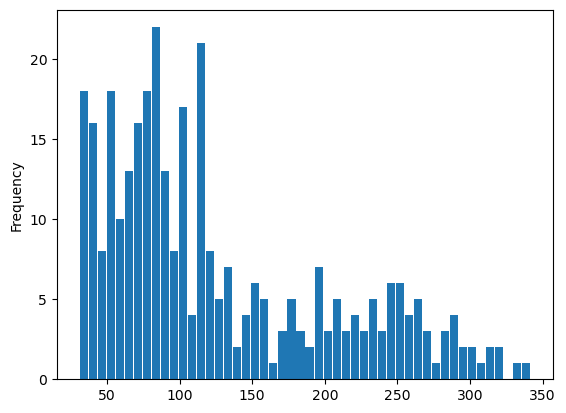

In [9]:
downtime_study(df_merge, dist_mtx_c2c, drop_prestations)

/Users/guillaumeplassais/Documents/HEC/data_4_health/utils/utils.py:77: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  data["intervenants"]["Compétences"]
/Users/guillaumeplassais/Documents/HEC/data_4_health/utils/EDT_analysis.py:338: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_merge[["Prestation", "Heure de début", "Heure de fin"]]


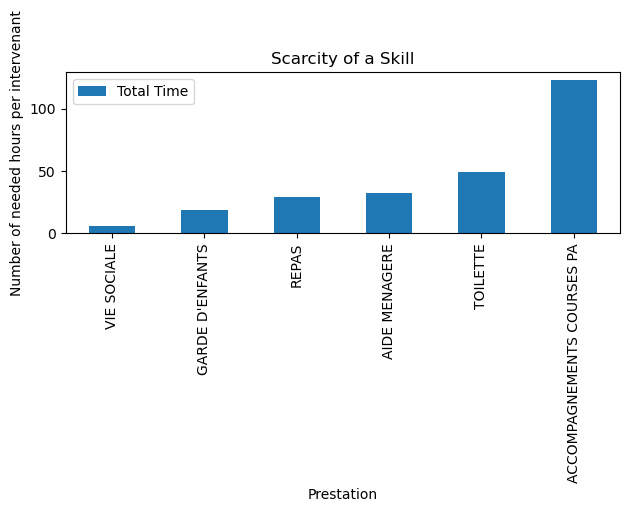

In [10]:
scarcity_of_a_skill(df_merge, drop_prestations)

In [11]:
intensity_metrics(df_merge)

0.7685531874039938

In [12]:
get_travel_time(df_merge, dist_mtx_c2c, drop_prestations)

Time (in hours) spend in travel per workday: 1.10
Time (in hours) spend in travel on January: 478.23
